In [248]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Populating the interactive namespace from numpy and matplotlib


In [249]:
from scipy import stats

In [250]:
#импортируем файл с данными
data = pd.read_csv('./psy_stats.csv',delimiter=';')
data = data.set_index('variables')
data = data*3
data.rename(index=str,columns={'before ':'before'}, inplace = True)

In [251]:
data

,before,1_year,2_years
variables,,,
v1,66,42,24
v2,75,66,57
v3,69,54,45
v4,36,24,18
v5,63,51,42
v6,57,48,30
v7,54,54,45
v8,81,81,75
v9,66,57,48


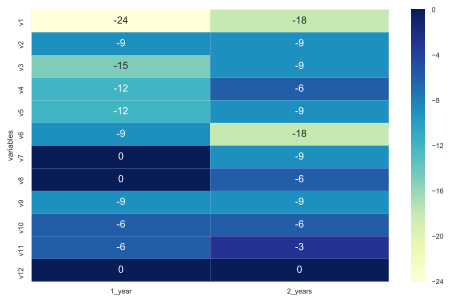

In [252]:
#бегло посмотрим, что изменилось после 1 и 2 года сильнее всего 
sns.heatmap(data.diff(axis=1)[data.columns[1:]], annot = True, cmap="YlGnBu")
sns.set(font_scale=0.7)

In [253]:
#фиксируем размер выборки
sample = 100

In [254]:
#добавляем дисперсию
for i in data.columns:
    data[i+'_dispersion'] = data[i].apply(lambda x:x*(sample-x)/(sample**2))

In [255]:
data

,before,1_year,2_years,before_dispersion,1_year_dispersion,2_years_dispersion
variables,,,,,,
v1,66,42,24,0.2244,0.2436,0.1824
v2,75,66,57,0.1875,0.2244,0.2451
v3,69,54,45,0.2139,0.2484,0.2475
v4,36,24,18,0.2304,0.1824,0.1476
v5,63,51,42,0.2331,0.2499,0.2436
v6,57,48,30,0.2451,0.2496,0.2100
v7,54,54,45,0.2484,0.2484,0.2475
v8,81,81,75,0.1539,0.1539,0.1875
v9,66,57,48,0.2244,0.2451,0.2496


Количество степеней свободы = 99 (sample - 1)

Таким образом, коэффициент Стьюдента для уровня стат. значимости p=0.05 = 1,984(табл)

In [256]:
#запишем коэффициент Стьюдента в переменную
stud_coeff = 1.984

Посчитаем Z-статистику для каждого случая (сравниваем каждую стадию наблюдения с каждой)

In [257]:
columns = [x for x in data.columns if 'dispersion' not in x]
for i in columns:
    for j in columns:
        data["Z_"+i+"_vs_"+j] = \
        abs(data[i]-data[j])/sample/(data[i+'_dispersion']+data[j+'_dispersion'])**0.5*10
Z_test_results = data[['Z_before_vs_1_year','Z_before_vs_2_years','Z_1_year_vs_2_years']]
data.drop([x for x in data.columns if 'Z' in x], axis = 1, inplace = True)

In [258]:
Z_test_results

,Z_before_vs_1_year,Z_before_vs_2_years,Z_1_year_vs_2_years
variables,,,
v1,3.508232,6.585046,2.757831
v2,1.402318,2.736713,1.313484
v3,2.206121,3.533234,1.278043
v4,1.867718,2.927700,1.044466
v5,1.726663,3.041562,1.281147
v6,1.279592,4.002307,2.655110
v7,0.000000,1.278043,1.278043
v8,0.000000,1.026880,1.026880
v9,1.313484,2.614468,1.279592


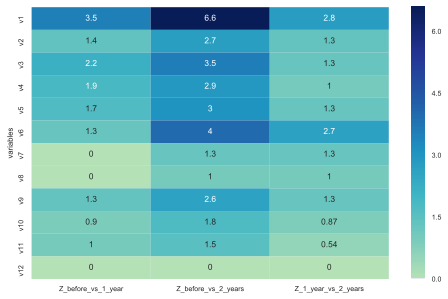

In [260]:
sns.heatmap(Z_test_results, center=stud_coeff, annot = True, cmap="YlGnBu")
sns.set(font_scale=0.7)

Сравниваем получившиеся результаты Z-статистики с коэффициентом Стьюдента для 95% доверительного интервала и 99 наблюдений

In [261]:
Z_test_results>stud_coeff

,Z_before_vs_1_year,Z_before_vs_2_years,Z_1_year_vs_2_years
variables,,,
v1,True,True,True
v2,False,True,False
v3,True,True,False
v4,False,True,False
v5,False,True,False
v6,False,True,True
v7,False,False,False
v8,False,False,False
v9,False,True,False
